In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!ln -s ../fastai/fastai/ fastai

ln: failed to create symbolic link 'fastai/fastai': File exists


In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
from sklearn.metrics import f1_score

def f1(preds, targs):
    return f1_score(targs, np.argmax(preds, axis=1), average='micro')
    
metrics = [f1]

In [15]:
PATH= "../data/plantseedings/"
sz = 256
bs = 64

In [7]:
model = resnet50

In [8]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [16]:
def get_data(sz):
    tfms = tfms_from_model(model, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, 'train_all', label_csv, tfms=tfms,
                    suffix='', val_idxs=val_idxs, test_name='test')

In [17]:
data = get_data(sz)

In [18]:
torch.manual_seed(43)
learn = ConvLearner.pretrained(model, data, precompute=True, metrics=metrics)

100%|██████████| 13/13 [00:02<00:00,  6.47it/s]


In [19]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 53%|█████▎    | 32/60 [00:01<00:00, 31.65it/s, loss=16.9]


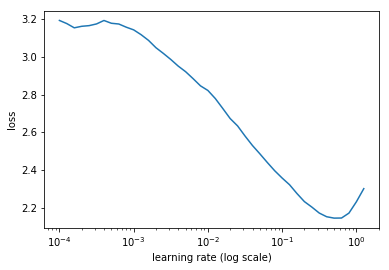

In [20]:
learn.sched.plot()

In [21]:
learn.fit(0.1, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[ 0.       1.32392  0.69841  0.77951]                     
[ 1.       0.8704   0.47559  0.83121]                      
[ 2.       0.64859  0.40793  0.86825]                      
[ 3.       0.49659  0.40395  0.86154]                      
[ 4.       0.39693  0.37931  0.87612]                      
[ 5.       0.32911  0.38768  0.87801]                      
[ 6.       0.29246  0.4022   0.8728 ]                      
[ 7.       0.24291  0.39445  0.88113]                      
[ 8.       0.22245  0.40369  0.87508]                      
[ 9.       0.23042  0.47888  0.86721]                      



In [22]:
learn.precompute = False

In [23]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 95%|█████████▌| 57/60 [00:13<00:00,  4.23it/s, loss=4.12] 

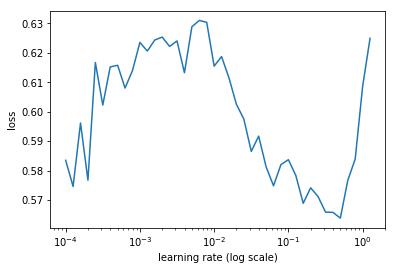

In [24]:
learn.sched.plot()

In [25]:
lr = 0.05

In [26]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))


 48%|████▊     | 29/60 [00:07<00:07,  4.08it/s, loss=0.504]


Exception in thread Thread-33:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-34:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeErro

[ 0.       0.49146  0.34751  0.87677]                      
[ 1.       0.44719  0.28791  0.89383]                      
[ 2.       0.38075  0.28583  0.89591]                      
[ 3.       0.3702   0.28284  0.89402]                      
[ 4.       0.37379  0.25679  0.90112]                      
[ 5.       0.33286  0.26335  0.90216]                      
[ 6.       0.30419  0.25575  0.9032 ]                      



In [27]:
lrs = np.array([lr/100,lr/10,lr])

In [28]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)


HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.46324  0.27022  0.90046]                      
[ 1.       0.31871  0.15461  0.94128]                      
[ 2.       0.20637  0.1563   0.94649]                      
[ 3.       0.17971  0.16306  0.93627]                      
[ 4.       0.14608  0.14997  0.94961]                      
[ 5.       0.10108  0.11196  0.96211]                      
[ 6.       0.0791   0.11312  0.96107]                       



In [29]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.08643  0.113    0.95918]                       
[ 1.       0.08811  0.12353  0.95795]                       
[ 2.       0.06812  0.11291  0.96543]                       
[ 3.       0.07175  0.14779  0.94876]                       
[ 4.       0.05946  0.1106   0.96543]                       
[ 5.       0.05116  0.10662  0.96628]                       
[ 6.       0.04253  0.10035  0.96941]                       



In [23]:
sz=128

In [24]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.34419  0.48896  0.85413]                      
[ 1.       0.30005  0.43291  0.86142]                      
[ 2.       0.30358  0.43112  0.86682]                      
 40%|████      | 24/60 [00:03<00:05,  6.04it/s, loss=0.293]

KeyboardInterrupt: 